In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x_exp = np.array([1,1,2,3,2,2,3,2,3,2])

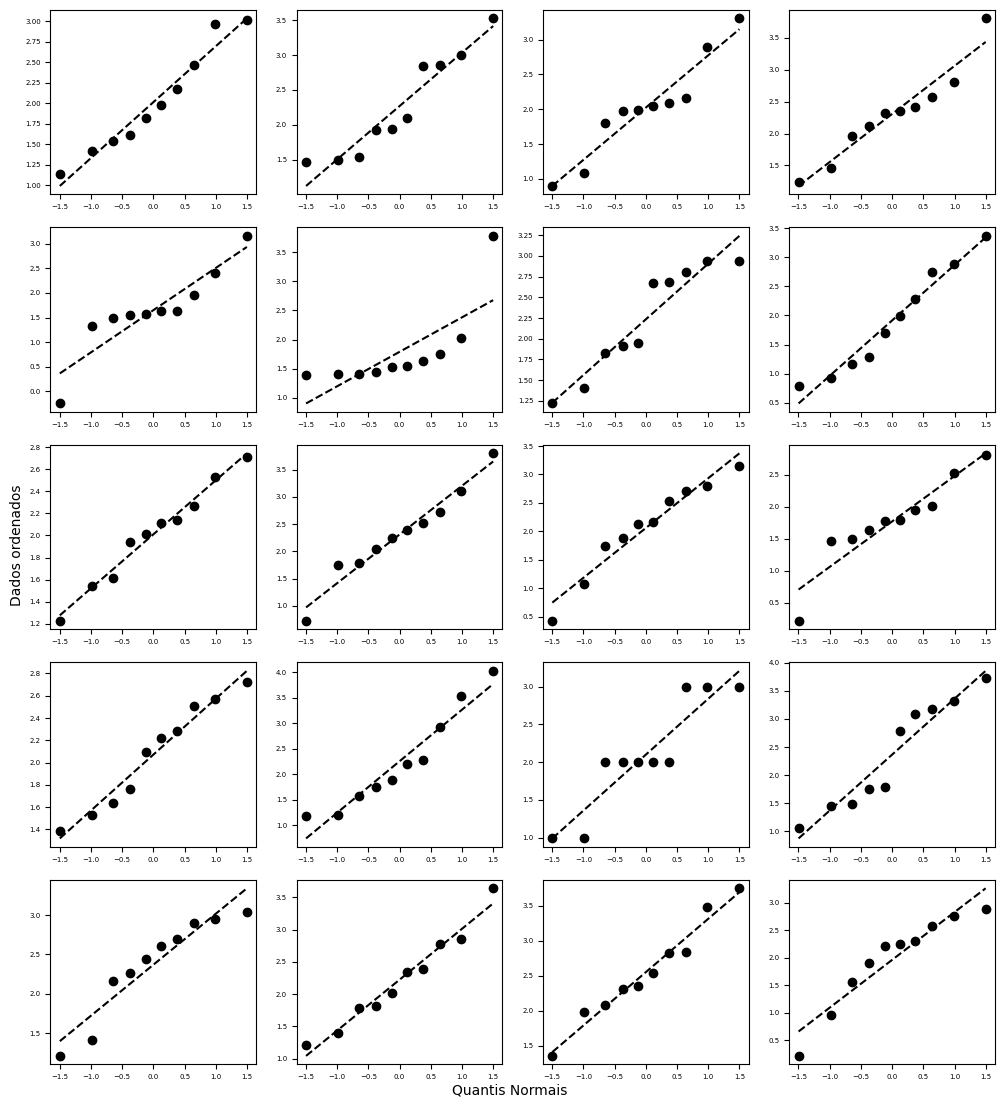

In [3]:
def get_prob_data(sample):
    """This function applys the probplot, returning the data to plot the graph
    """
    data, params = stats.probplot(sample)
    line = params[1] + params[0]*data[0]
    return data, line

def make_plot(sample_data, real_data_position, show):
    """This function plots and exports the probplots.
    """

    rows = 4
    cols = 5
    fig, ax = plt.subplots(cols, rows, figsize=(10,11))

    i = 0
    if show:
        color = "r"
    else:
        color = "k"
    for row in range(rows):

        for col in range(cols):

            if i == real_data_position:
                x_y_data, line = get_prob_data(sample_data[i])    
                ax[col, row].scatter(x_y_data[0], x_y_data[1], c=color)
                ax[col, row].plot(x_y_data[0], line, ls="--", c=color)

            else:
                x_y_data, line = get_prob_data(sample_data[i])    
                ax[col, row].scatter(x_y_data[0], x_y_data[1], c="k")
                ax[col, row].plot(x_y_data[0], line, ls="--", c="k")            

            i += 1
            ax[col, row].tick_params(axis='both', which='major', labelsize=5)


    fig.text(0.5, 0.0, 'Quartis teóricos Normais', ha='center')
    fig.text(0.0, 0.5, 'Dados ordenados', va='center', rotation='vertical')
    fig.patch.set_facecolor('white')
    fig.tight_layout()
    
    if color == "k":
        plt.savefig("probplot.png", dpi=300, bbox_inches='tight')
        plt.show()
    else:
        plt.savefig("probplot_colored.png", dpi=300, bbox_inches='tight')
        plt.close()


# getting a random number from range of plots to plot the users probplot
position = np.arange(20)
real_data_position = np.random.choice(position)


# making the synthetic data and grouping it with the real data at the random position
data = []
mean = x_exp.mean()
std = x_exp.std(ddof=1)
size = x_exp.size

for pos in position:
    if pos == real_data_position:
        data.append(x_exp)
    else:
        data.append(stats.norm.rvs(loc=mean, scale=std, size=size,))
        
        
make_plot(data, real_data_position, show=True)
make_plot(data, real_data_position, show=False)        